# Primer Examen 15%

## Ejercicio 1
El siguiente url entrega 100 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos anidada

In [1]:
import pandas as pd

In [2]:
df=pd.read_json('https://api.crossref.org/journals/1029-8479/works?rows=100')
df

,status,message-type,message-version,message
facets,ok,work-list,1.0.0,{}
items,ok,work-list,1.0.0,"[{'indexed': {'date-parts': [[2020, 3, 30]], '..."
items-per-page,ok,work-list,1.0.0,100
query,ok,work-list,1.0.0,"{'start-index': 0, 'search-terms': None}"
total-results,ok,work-list,1.0.0,31567


In [166]:
df.loc['items','message']

[{'DOI': '10.1088/1126-6708/2001/03/051',
  'ISSN': ['1029-8479'],
  'URL': 'http://dx.doi.org/10.1088/1126-6708/2001/03/051',
  'author': [{'affiliation': [],
    'family': 'Manjarín',
    'given': 'Juan José',
    'sequence': 'first'}],
  'container-title': ['Journal of High Energy Physics'],
  'content-domain': {'crossmark-restriction': False, 'domain': []},
  'created': {'date-parts': [[2002, 8, 25]],
   'date-time': '2002-08-25T03:22:39Z',
   'timestamp': 1030245759000},
  'deposited': {'date-parts': [[2007, 2, 13]],
   'date-time': '2007-02-13T20:56:13Z',
   'timestamp': 1171400173000},
  'indexed': {'date-parts': [[2020, 3, 30]],
   'date-time': '2020-03-30T18:43:28Z',
   'timestamp': 1585593808172},
  'is-referenced-by-count': 2,
  'issn-type': [{'type': 'electronic', 'value': '1029-8479'}],
  'issue': '03',
  'issued': {'date-parts': [[2001, 3, 29]]},
  'journal-issue': {'issue': '03',
   'published-online': {'date-parts': [[2001, 3, 1]]}},
  'member': '297',
  'page': '051-05

In [173]:
import json
import requests

m= requests.get('https://api.crossref.org/journals/1029-8479/works?rows=100')

DOIs=[]

datos= json.loads(m.text)
lista=datos['message']['items']

for item in lista:
  for author in item['author']:
    if author['family']=='Strumia' and author['given']=='Alessandro':
      DOIs.append(item['DOI'])

DOIs

['10.1088/1126-6708/2000/12/016', '10.1088/1126-6708/2001/11/048']

## Ejercicio 2
2a) Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10

2b) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

2c) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

2d) Grafique el polinomío inclueyendo los puntos asociados a las raices.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate

**Polinomio**

In [23]:
P=np.poly1d([1,2,3,4,5,6,7],r=True)
print(P)

   7      6       5        4        3             2
1 x - 28 x + 322 x - 1960 x + 6769 x - 1.313e+04 x + 1.307e+04 x - 5040


**Raíces de la derivada del polinomio**

In [67]:
pp=P.deriv()
print(pp.roots)

[6.67803759 5.59578204 4.53065467 3.46934533 2.40421796 1.32196241]


**Mínimos**

In [84]:
optimize.fmin_powell(P,2.4)

Optimization terminated successfully.
         Current function value: -inf
         Iterations: 1
         Function evaluations: 221


/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: overflow encountered in multiply
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2364: RuntimeWarning: overflow encountered in multiply
  tmp1 = (xb - xa) * (fb - fc)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in true_divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2365: RuntimeWarning: overflow encountered in multiply
  tmp2 = (xb - xc) * (fb - fa)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2366: RuntimeWarning: invalid value encountered in subtract
  val = tmp2 - tmp1
/usr/local/lib/python3.6/dist-packages/numpy/lib/polynomial.py:736: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
/usr/local/lib/python3.6/dist-packages/scipy/optim

array(-1.99690512e+44)

In [83]:
optimize.fmin_powell(P,4.5)
#No arrojó el mínimo local

Optimization terminated successfully.
         Current function value: -12.358778
         Iterations: 2
         Function evaluations: 51


array(4.53065449)

In [50]:
optimize.fmin_powell(P,6)

Optimization terminated successfully.
         Current function value: -95.841903
         Iterations: 2
         Function evaluations: 26


array(6.67803959)

***Nota:*** al utilizar fmin_powell, no reconoció un mínimo local en x=2.40

**Máximos**


Utilizo el polinomio negativo para hallar los máximos


In [82]:
optimize.fmin_powell(-P,1.32)

Optimization terminated successfully.
         Current function value: -95.841903
         Iterations: 1
         Function evaluations: 14


array(1.32196918)

In [85]:
optimize.fmin_powell(-P,3.5)

Optimization terminated successfully.
         Current function value: -12.358778
         Iterations: 2
         Function evaluations: 26


array(3.46934532)

In [87]:
optimize.fmin_powell(-P,5.5)

Optimization terminated successfully.
         Current function value: -23.148994
         Iterations: 2
         Function evaluations: 27


array(5.5957829)

**Gráfico**

Text(0, 0.5, 'y')

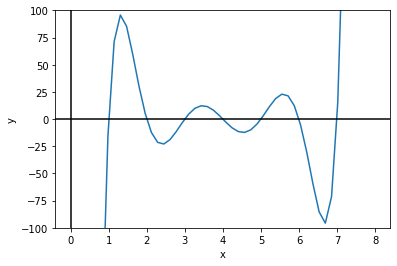

In [59]:
x=np.linspace(0,8)
plt.plot(x,P(x))
plt.axhline(y=0,color='k')
plt.ylim(-100,100)
plt.axvline(x=0,color='k')
plt.xlabel('x')
plt.ylabel('y')

***Nota:*** El valor mínimo (1.32) corresponde al máximo global, mientras que el valor máximo (6.67) corresponde al mínimo global.